# Chapter 4. Relationships between Observations

The previous chapter discussed ways to measure relationships between variables, or the _columns_ of a `DataFrame`. This chapter is about how to measure relationships between observations, or the _rows_ of a `DataFrame`.

# Chapter 4.1 Distance Metrics

How do we measure how "similar" two observations are? To keep things simple, we will start with a data set where all the variables are quantitative: a data set about the chemical properties of 1599 red wines.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.options.display.max_rows = 5

wines = pd.read_csv("../data/wines/reds.csv", sep=";")
wines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
...             ...               ...          ...             ...        ...   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
...                   ...                   ...      ...   ...        ...   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
...       ...      ...  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

<AxesSubplot:ylabel='Frequency'>

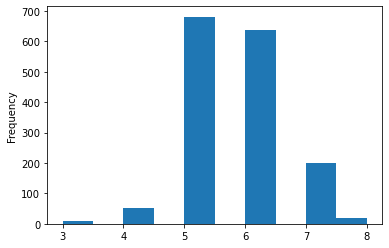

In [2]:
wines.quality.plot.hist()

In [3]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wines[["pH", "free sulfur dioxide"]]

pH  free sulfur dioxide
0     3.51                 11.0
1     3.20                 25.0
...    ...                  ...
1597  3.57                 32.0
1598  3.39                 18.0

[1599 rows x 2 columns]

To simplify things even further, let's start by just looking at just two variables: pH and free sulfur dioxide. We can make a scatterplot of these two variables.

<AxesSubplot:xlabel='pH', ylabel='free sulfur dioxide'>

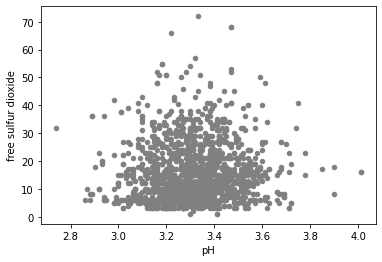

In [4]:
wines.plot.scatter(x="pH", y='free sulfur dioxide', c = 'grey')

<AxesSubplot:xlabel='pH', ylabel='free sulfur dioxide'>

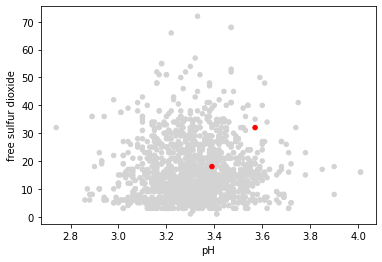

In [6]:
colors = pd.Series("lightgray", index=wines.index)   ## prepare colors array
colors.loc[[1597, 1598]] = "red"                     ## let's color two specific wines red

wines.plot.scatter(x="pH", y="free sulfur dioxide", c=colors)

How similar are the two observations represented by red points? The obvious way to measure similarity is to calculate the distance between the points. The smaller the distance, the more similar the observations.

<img src="distance.png">

Calculating the distance between two points is not as easy as it might seem. First, there is the question of how to define distance. In general, a **distance metric** can be any function of two observations, $ d({\bf x}, {\bf x'}) $, which is...

- non-negative: $d({\bf x}, {\bf x'}) \geq 0$ for all points ${\bf x}$ and ${\bf x'}$
- zero for any observation and itself: $d({\bf x}, {\bf x}) = 0$

Some people, particularly mathematicians, require that distance metrics satisfy additional properties, such as symmetry ($d({\bf x}, {\bf x'}) = d({\bf x'}, {\bf x})$) and the triangle inequality, but many distance "metrics" used in practice do not satisfy those properties. The two properties above are the only ones that are satisfied by virtually all distance metrics used in practice.

You are probably most familiar with **Euclidean distance**, which is the straight-line distance ("as the crow flies") between two points. The length of the straight-line can be calculated using the Pythagorean Theorem:

$$ d({\bf x}, {\bf x'}) = \sqrt{(x_1 - x'_1)^2 + (x_2 - x'_2)^2} $$

This formula generalizes to more than two variables. If we have $D$ variables, the formula becomes:

$$ d({\bf x}, {\bf x'}) = \sqrt{\sum_{j=1}^D (x_j - x'_j)^2} $$

Let's calculate the distance between the two observations above, using all of the variables in the data set.

In [17]:
x = wines.loc[1597]
x_prime = wines.loc[1598]

list(x), list(x_prime)
x
#x - x_prime

fixed acidity        5.900
volatile acidity     0.645
                     ...  
alcohol             10.200
quality              5.000
Name: 1597, Length: 12, dtype: float64

In [28]:
xs = x[["free sulfur dioxide", "pH"]]
xs_prime= x_prime[["free sulfur dioxide", "pH"]]

list(xs),list(xs_prime)

([32.0, 3.57], [18.0, 3.39])

In [11]:
list((x - x_prime)**2)

[0.009999999999999929,
 0.11222500000000002,
 0.12249999999999998,
 2.5600000000000005,
 6.399999999999989e-05,
 196.0,
 4.0,
 4.0000000000080005e-10,
 0.0323999999999999,
 0.0024999999999999935,
 0.6400000000000011,
 1.0]

In [13]:
((x-x_prime)**2).sum()

204.47968900040001

In [14]:
eucledeanDistance = np.sqrt(((x - x_prime) ** 2).sum())

eucledeanDistance

14.299639470993666

In [30]:
np.sqrt(((xs - xs_prime)**2).sum())

14.001157095040394

To convince you that this is not the only way to calculate the distance between these two points, we can also consider [**taxicab distance**](https://en.wikipedia.org/wiki/Taxicab_geometry):

$$ d({\bf x}, {\bf x'}) = \sum_{j=1}^D |x_j - x'_j|. $$

Taxicab distance is so named because it measures how far a taxicab would have to drive to get from point A to point B. (Because of the layout of the streets, the taxicab cannot travel in a straight line from A to B.)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/283px-Manhattan_distance.svg.png">

In [31]:
manhattanDistance = ((x - x_prime).abs()).sum()
manhattanDistance, eucledeanDistance

(20.42302, 14.299639470993666)

In [34]:
## comparison of 2D distances:

((xs-xs_prime).abs()).sum(), np.sqrt(((xs - xs_prime)**2).sum())

(14.18, 14.001157095040394)

This is a noticeably different number!

You might want to know which distance metric is better. There is no easy answer to this question; it depends on the data and the application. Because differences are _squared_ in Euclidean distance, a large difference in _any_ variable will have a large effect on the Euclidean distance. On the other hand, taxicab distance treats all variables the same.

For example, consider the pair of points $(0, 0)$ and $(2, 2)$. Euclidean distance says that they are $\sqrt{2^2 + 2^2} = 2.8$ units apart, while Manhattan distance says that they are $2 + 2 = 4$ units apart. Don't compare these two numbers to each other. Instead, compare them to the distances for a different pair of points.

Now consider the pair of points $(0, 0)$ and $(3, 1)$. Would you consider these points to be closer or further than the pair above? Euclidean distance says that they are $\sqrt{3^2 + 1^2} \approx 3.2$ units apart (so further than before), while Manhattan distance still considers them $3 + 1 = 4$ units apart. So Euclidean distance penalizes observations more heavily for being off on any one variable. It prefers that differences be evenly distributed among the variables.

In general, distances can be defined between all kinds of observations, not just vectors of numbers. Later in this book, we will see how to calculate distances between strings, documents, and so on.

## The Importance of Standardization

Here's a quiz. There are two red points in the plot below, each labeled by its index in the `DataFrame`. Which one is closer to the blue point (using Euclidean distance, just based on these two variables alone)?

<img src="closer.png">


<AxesSubplot:xlabel='pH', ylabel='free sulfur dioxide'>

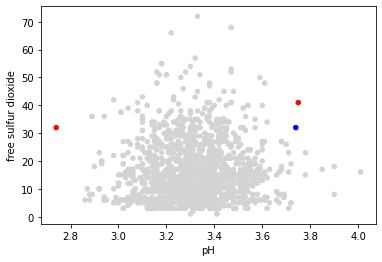

In [35]:
colors = pd.Series("lightgray", index=wines.index)   ## prepare colors array
colors.loc[[151, 94]] = "red"                     ## let's color two specific wines red
colors.loc[553] = 'blue'

wines.plot.scatter(x="pH", y="free sulfur dioxide", c=colors)


Let's calculate the distances.

In [36]:
x_vars = ["pH", "free sulfur dioxide"]   ## variables we want to consider
x553 = wines.loc[553, x_vars]
x151 = wines.loc[151, x_vars]
x94 = wines.loc[94, x_vars]

list(x553), list(x151),list(x94)

([3.74, 32.0], [2.74, 32.0], [3.75, 41.0])

In [37]:
# Distance between 151 and 553

np.sqrt(((x151 - x553) ** 2).sum())

1.0

In [38]:
# Distance between 94 and 553

np.sqrt(((x94 - x553) ** 2).sum())

9.000005555553841

Surprised by the answer? The scatterplot is deceiving because it automatically scales the variables to make all of the points fit into the limited space. In reality, the spread of the sulfur dioxide values is so much larger (on the order of tens) than the spread of the pH values (on the order of tenths).

The plot below shows the same data, drawn to scale. You can see that differences in sulfur dioxide dominate the distance metric; differences in pH hardly matter at all.

<AxesSubplot:xlabel='pH', ylabel='free sulfur dioxide'>

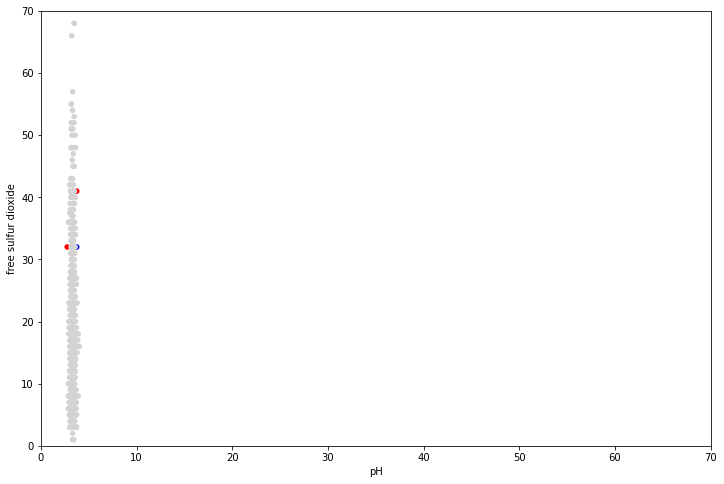

In [39]:
colors = pd.Series("lightgray", index=wines.index)
colors.loc[[94, 151]] = "red"
colors.loc[553] = "blue"

wines.plot.scatter(x="pH", y="free sulfur dioxide", c=colors, 
                   xlim=(0, 70), ylim=(0, 70), figsize=(12,8))

To obtain distances that agree more with our intuition---and that do not give undue weight to one variable---we transform the variables to be on the same scale. There are a few ways to do this:

- **standardizing**: subtract each variable by its mean, then divide by its standard deviation, 
$$ x_i \leftarrow \frac{x_i - \bar x}{s} $$
- **normalizing**: scale each variable to have length (or "norm") 1, 
$$ x_i \leftarrow \frac{x_i}{\sqrt{\sum_{i=1}^n x_i^2}} $$
- **min/max scaling**: scale each variable to take on values between [0, 1], 
$$x_i \leftarrow \frac{x_i - \min(x_1, ..., x_n)}{\max(x_1, ..., x_n) - \min(x_1, ..., x_n)}$$.

Let's first try standardizing.

In [27]:
wines_s = (wines - wines.mean()) / wines.std()
wines_s

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
1         -0.298454          1.966827    -1.391037        0.043403   0.223805   
...             ...               ...          ...             ...        ...   
1597      -1.389721          0.654416    -0.775024       -0.382151  -0.264878   
1598      -1.332285         -1.216469     1.021680        0.752659  -0.434854   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.466047             -0.379014  0.558100  1.288240   
1                0.872365              0.624168  0.028252 -0.719708   
...                   ...                   ...       ...       ...   
1597             1.541571             -0.075020 -0.676446  1.676875   
1598             0.203159             -0.135818 -0.665849  0.510970   

      sulphates   alcohol   quality  
0     -0.579025 -0.959946 -0.787576  
1      0.128910 -0.584594 -0.787576  
...         ...       ...       ...  
1597   0.305894 -0.209243 -0.787576  
1598   0.010921  0.541460  0.450707  

[1599 rows x 12 columns]

Notice that the resulting `DataFrame` is filled with negative values and values with magnitude less than 1. This makes sense if the variables now have mean 0 and SD 1.

The above command is deceptively simple. Notice that we actually subtracted a `DataFrame` by a `Series`, then divided the resulting `DataFrame` by another `Series`. We relied on the fact that `pandas` chooses the right axis along which to align the `Series`. To be more explicit, we could write:

In [28]:
wines_s = wines.sub(wines.mean(), axis=1).divide(wines.std(), axis=1)
wines_s

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
1         -0.298454          1.966827    -1.391037        0.043403   0.223805   
...             ...               ...          ...             ...        ...   
1597      -1.389721          0.654416    -0.775024       -0.382151  -0.264878   
1598      -1.332285         -1.216469     1.021680        0.752659  -0.434854   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.466047             -0.379014  0.558100  1.288240   
1                0.872365              0.624168  0.028252 -0.719708   
...                   ...                   ...       ...       ...   
1597             1.541571             -0.075020 -0.676446  1.676875   
1598             0.203159             -0.135818 -0.665849  0.510970   

      sulphates   alcohol   quality  
0     -0.579025 -0.959946 -0.787576  
1      0.128910 -0.584594 -0.787576  
...         ...       ...       ...  
1597   0.305894 -0.209243 -0.787576  
1598   0.010921  0.541460  0.450707  

[1599 rows x 12 columns]

Now let's recalculate distances using the standardized data.

In [29]:
x_vars = ["pH", "free sulfur dioxide"]
x553 = wines_s.loc[553, x_vars]

In [30]:
# Distance between 151 and 553, standardized data
x151 = wines_s.loc[151, x_vars]
np.sqrt(((x151 - x553) ** 2).sum())

6.477251750176277

In [31]:
# Distance between 94 and 553, standardized data
x94 = wines_s.loc[94, x_vars]
np.sqrt(((x94 - x553) ** 2).sum())

0.862842369753571

Now we see that observation 94 is much closer than observation 151, which agrees with our intuition from the scatterplot.

# Exercises

**Exercise 1.** In the example above, we standardized the variables before calculating distances. How would the distances change if we instead normalized the variables? Or if we instead applied a min/max scaling to the variables?

In [ ]:
# ENTER YOUR CODE HERE

**Exercise 2.** Which wine is most similar to the wine in row 267? Use all of the variables, and see how sensitive your answer is to the choice of distance metric and standardization method?

_Hint:_ You can do this without a `for` loop. Take advantage of broadcasting!

In [ ]:
# ENTER YOUR CODE HERE

**Exercise 3**  We often want to observe pairwise distances between multiple data points.  This is typically done using a **distance matrix**, a 2-dimensional table where both rows and columns are data points, and an intersection of the _i_th row and the _j_th column is the distance between the _i_th and the _j_th data point.

Compute and output the  Eucledean distance matrix for the first five wines in the dataset (`wines.loc[0:4]`) using the following dimensions: "fixed acidity", "volatile acidity" and "citric acid".

Do what you need to do (this may take some effort.


In [45]:
# ENTER YOUR CODE HERE